# Project-3 AVACADO

## Problem Statement

We have two problem statement for this project:

        1- Predict the Avacado's Average Price based on
           different features.
        2- Predict the City or Region of Avacado's

### Data Description

The Avacado dataset captures average price of avacado given certain volume of different kinds of Avacado is sold in different regions.

Date - The date of the observation

AveragePrice - The average price of a single avocado - target variable

type - Conventional or organic

year - The year

Region - The city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


In [1]:
#Let's import the necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

#Print all the libraries are imported successfully
print("Successfully imported Libraries")

Successfully imported Libraries


In [2]:
#Let's load the avacado data set
avacado=pd.read_csv('avacado.csv')
print("Data Set is Successfully Loaded")

Data Set is Successfully Loaded


## Featured Engineering

### Data Processing

In [3]:
avacado.shape

(16468, 14)

 We have total 14 rows and 16468 columns present in avacado data set

In [4]:
avacado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
avacado.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clearly observe that we have many null values in the rows after row number 1517 whcih are not required for our prediction thus we can remove those rows and also the Unmaned column is also hav ing null values so we can remove that also.

## Featured Engineering

### Data Cleaning

In [6]:
#Let's drop all the unnecessary rows and columns
avacado.dropna(how='all',inplace=True)

In [7]:
avacado.drop(['Unnamed: 0','year'],axis=1,inplace=True)

Unmaned column has no value se we have dropped it

In [8]:
avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte


In [9]:
#Let's change the Date dtype to datetime series
avacado['Date']=pd.to_datetime(avacado['Date'])

In [10]:
#Lets extract the year and month from the Date for better visulatization
avacado['Year']=avacado['Date'].dt.year
avacado['Month']=avacado['Date'].dt.month
avacado.Month = avacado.Month.map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})
avacado['Day']=avacado['Date'].dt.day

We have splitted the date column in day, month and year for better visualization and EDA

In [11]:
avacado.columns.values

array(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'Year', 'Month', 'Day'], dtype=object)

In [12]:
columns_names=(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month', 'Day'])
columns_names

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'region',
 'Year',
 'Month',
 'Day']

In [13]:
#Let's Rearrange the columns in our data set for better presenation
columns_names[0],columns_names[1],columns_names[2],columns_names[3],columns_names[4],columns_names[5],columns_names[6],columns_names[7],columns_names[8],columns_names[9],columns_names[10],columns_names[11],columns_names[12],columns_names[13]=columns_names[0],columns_names[13],columns_names[12],columns_names[11],columns_names[1],columns_names[2],columns_names[3],columns_names[4],columns_names[5],columns_names[6],columns_names[7],columns_names[8],columns_names[9],columns_names[10]
columns_names

['Date',
 'Day',
 'Month',
 'Year',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'region']

We have successfully splitted and  rearranged the columns as per our requirement

In [14]:
avacado=avacado[columns_names]
avacado.head(5)

,Date,Day,Month,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,2015-12-27,27,DEC,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,2015-12-20,20,DEC,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,2015-12-13,13,DEC,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,2015-06-12,12,JUN,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,2015-11-29,29,NOV,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


In [15]:
#Let's drop the date column
avacado.drop(['Date'],axis=1,inplace=True)

In [16]:
#Let's check the dtypes of our data set
avacado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           1517 non-null   int64  
 1   Month         1517 non-null   object 
 2   Year          1517 non-null   int64  
 3   AveragePrice  1517 non-null   float64
 4   Total Volume  1517 non-null   float64
 5   4046          1517 non-null   float64
 6   4225          1517 non-null   float64
 7   4770          1517 non-null   float64
 8   Total Bags    1517 non-null   float64
 9   Small Bags    1517 non-null   float64
 10  Large Bags    1517 non-null   float64
 11  XLarge Bags   1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 165.9+ KB


#### After From the above table we can observe the following:

    1- We have 1517 rows and 13 columns in our data set.
    
    2- We do no the have any null values in our data set.
    
    3- We have three types of data types (dtypes) in our 
       data set i.e int64, object and float64
    
    4- Day and Year dtype is int64, for Month and region is
       object and rest all are float64

## Exploratory Data Anlysis

In [17]:
#Let's check the shape of our cleaned data set
avacado.shape

(1517, 13)

We have 1517 rows and 13 columns in the avacado data set

In [18]:
#Let's check for null values in the data set
avacado.isnull().sum()

Day             0
Month           0
Year            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
dtype: int64

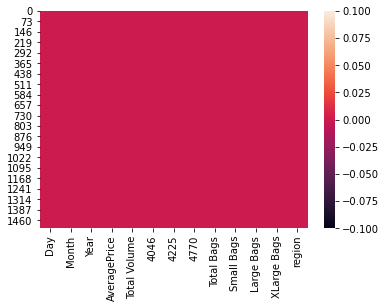

In [19]:
#Let's plot the heat map of null values
sns.heatmap(avacado.isnull())
plt.show()

From the above plot it is very cleary visible that now after removing all the null values we do not have any null values in our data set

In [20]:
#Let's check the correlation
avacado.corr()
avacado.corr().style.background_gradient(cmap='coolwarm')

,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Day,1.000000,0.029744,0.092589,-0.034857,-0.031806,-0.044008,-0.021318,-0.021137,-0.016462,-0.046578,0.019315
Year,0.029744,1.000000,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342
AveragePrice,0.092589,0.178683,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284
Total Volume,-0.034857,-0.004189,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717
4046,-0.031806,-0.040439,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063
4225,-0.044008,-0.007254,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718
4770,-0.021318,0.029222,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053
Total Bags,-0.021137,0.090108,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856
Small Bags,-0.016462,0.106382,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300
Large Bags,-0.046578,-0.018678,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779


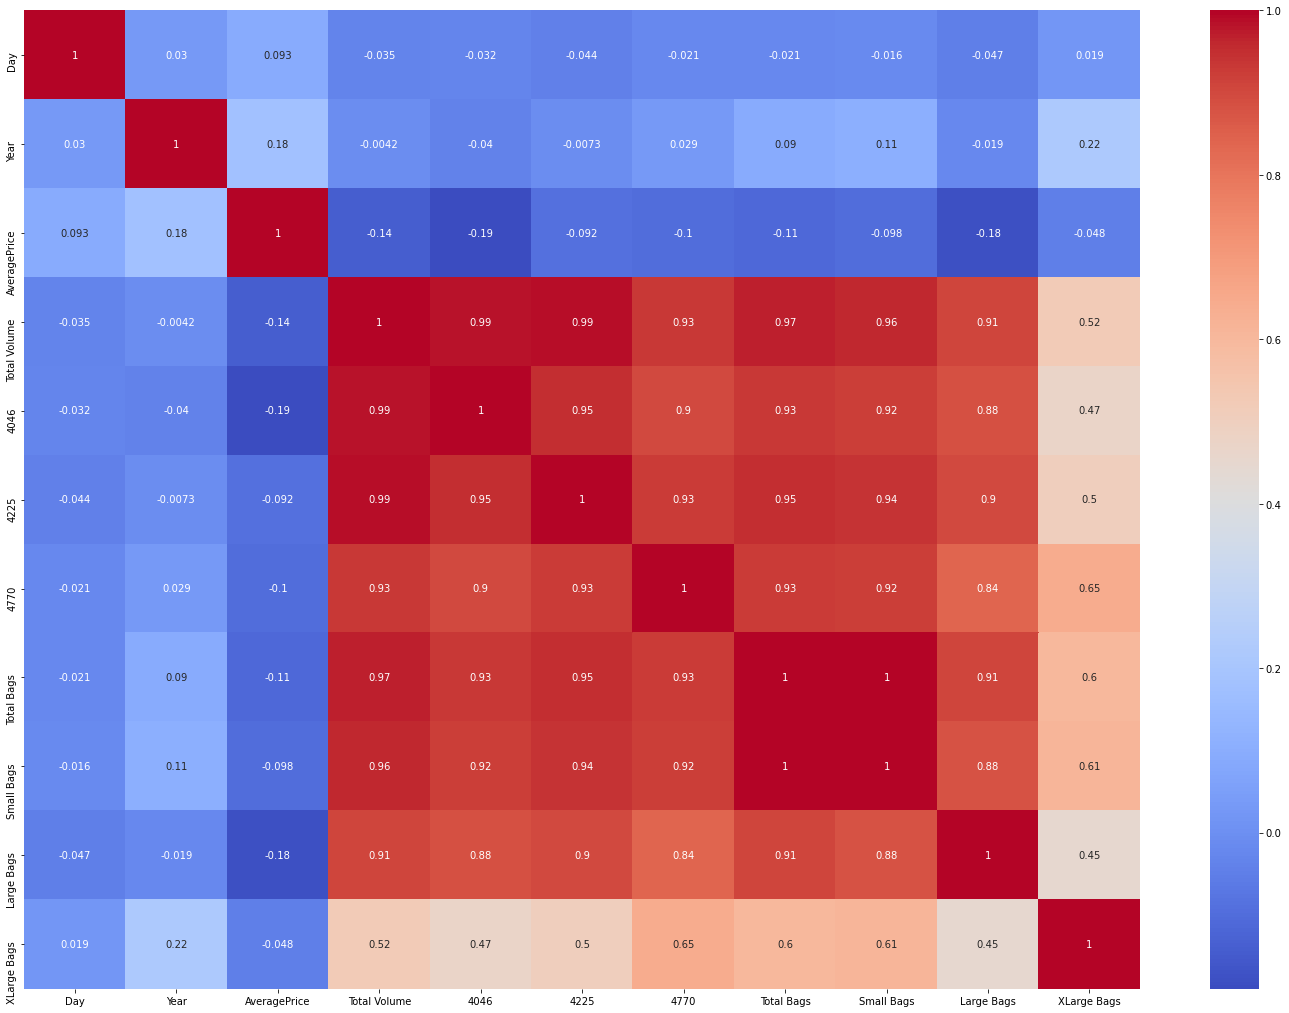

In [21]:
#Let's check the heat map of correlation
plt.figure(figsize=(25,18))
#sns.set(font_scale=2.5)
#plt.rcParams.update({'font.size': 30})
sns.heatmap(avacado.corr(),annot=True,cmap="coolwarm");

### Observation:
    
    1- Total volume, Small bags and and total bags are higly
        correlated
    
    2- Average price and Large, Small bags are higly negative
       correlated
    
    3- Xlarge bags and region are negatively correlated

In [22]:
#Let's check the statistics metrics
avacado.describe()

,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,15.253790,2015.162821,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,8.965902,0.369324,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,1.000000,2015.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,7.000000,2015.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,15.000000,2015.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,22.000000,2015.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,31.000000,2016.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


### Observations:
    
    1- 1515 values count in each columns confirm that we do
        not have any missing values in our data set.
        
    2- Average maximum proce is 111$ and minimum price is 0$
    
    3- Total Volume, Total Bag, 4046, 4770, 1225, Small
       and Large bags have highest standard deviation
        
    4- Total Number of bag are 1516 and min is 0  
    
    5- Average sales in each regoin is 758 bags
    
    6- There are total of 50 regions where avacado's are sold
       

## Exploratory Data Analysis

Text(0.5, 1.0, 'Average Price by Month')

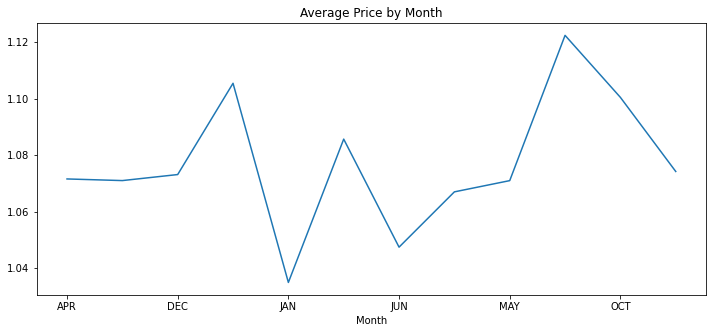

In [23]:
#Let's check the average price with repect to the month
dategroup = avacado.groupby('Month').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=avacado.Month)
plt.title('Average Price by Month')

We can observe fron the graph that in the april month there is drop in the avg price of avacado and the then it keep on increasing and decreasing. From july we can observe there is stedy increase in the avg price then again it drops september.

Text(0.5, 1.0, 'Average Price')

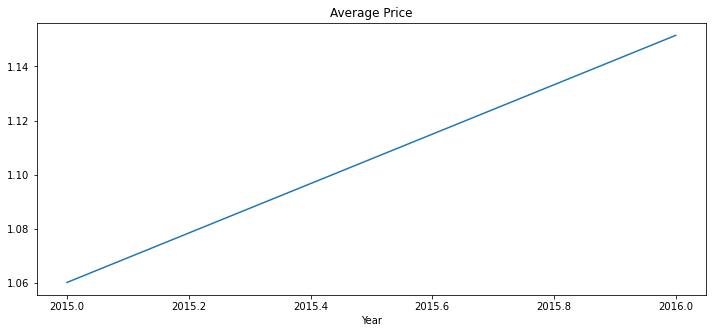

In [24]:
#Let's check the average price with repect to the year
dategroup = avacado.groupby('Year').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=avacado.Year)
plt.title('Average Price')

 We can observe the avg price has a increased through the years

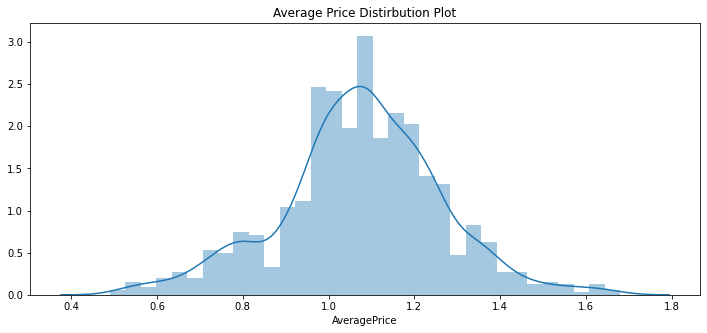

In [25]:
#Let's cehck the average price distribution
plt.figure(figsize=(12,5))
plt.title("Average Price Distirbution Plot")
ax = sns.distplot(avacado["AveragePrice"])

We can observe that avg price has a normal distribution and the it ranges from 40 to 85

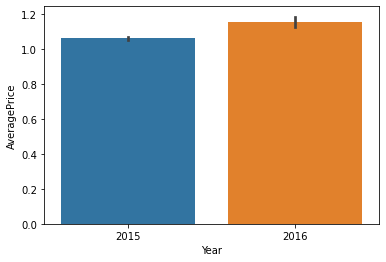

In [26]:
#Let's check the ratio of avg price and year
sns.barplot(x = "Year" , y = "AveragePrice" ,data=avacado )

We can observe the avg price in 2016 has increased as compared to the year 2015 

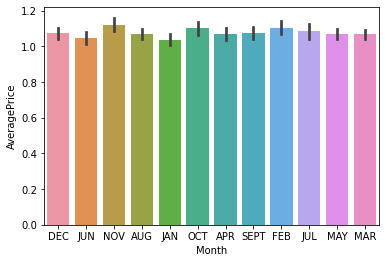

In [27]:
#Let's check the  ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=avacado );

 We can observe that in the september month we hae the highest average price, then followed by march, may, october, november and so on

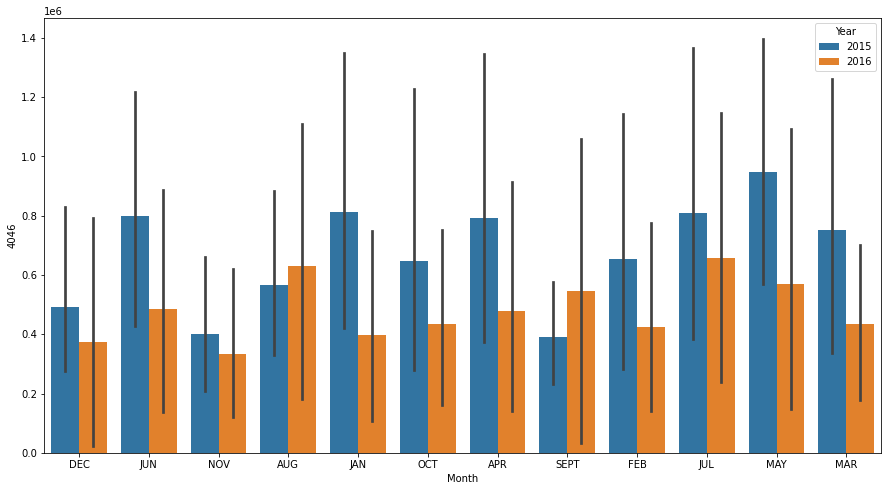

In [28]:
#Let's check the average price for 4046 
plt.subplots(figsize = (15,8))
sns.barplot(x = avacado['Month'], y= avacado['4046'],hue=avacado['Year']);

We can clearly observe that avg prie for 4046 is reduced in the year 2016 as compared to 2015

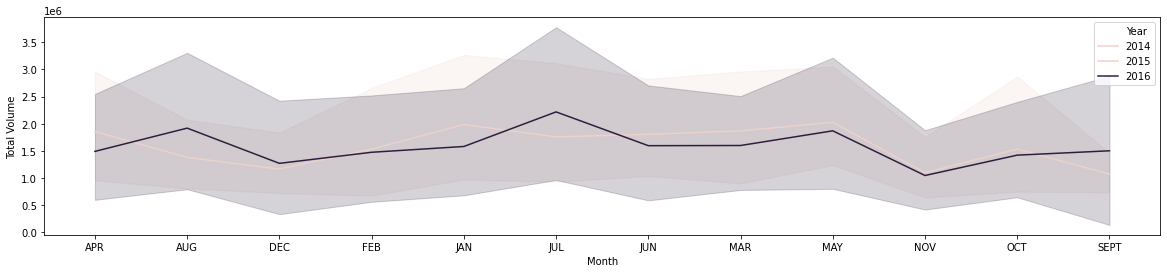

In [29]:
plt.subplots(figsize = (20,4))
sns.lineplot(x=avacado['Month'],y=avacado['Total Volume'],hue=avacado['Year']);

 We can observe that sale does not have a linear graph it keeps on increasing and decreasing throughout the year

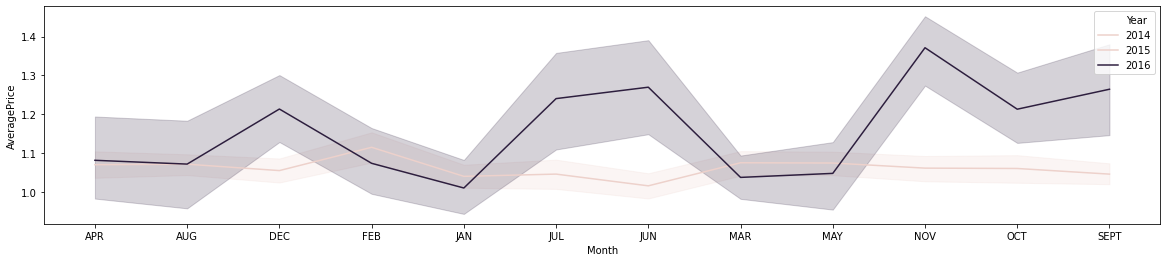

In [30]:
plt.subplots(figsize = (20,4))
sns.lineplot(x=avacado['Month'],y=avacado['AveragePrice'],hue=avacado['Year']);

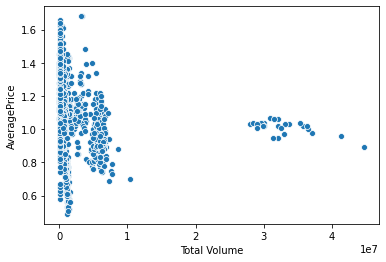

In [31]:
sns.scatterplot(avacado['Total Volume'],avacado['AveragePrice']);

We can observe that with increase in volume the average price is decreased

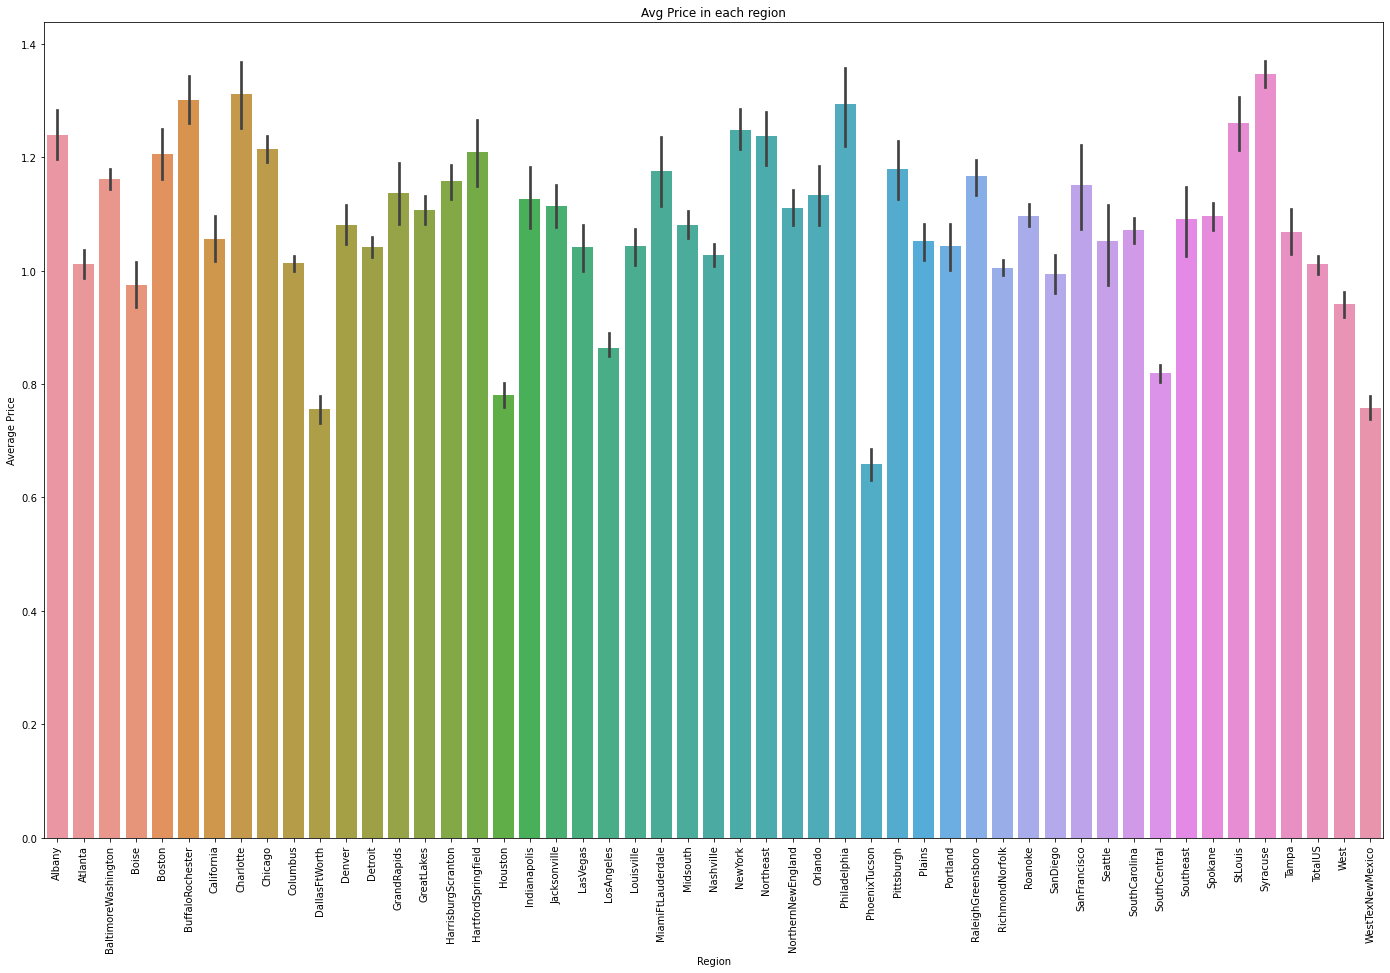

In [32]:
#Let's check the  avg price in each region
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=avacado)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Avg Price in each region');

 We can observe that syracuse has the highest avg price, followed by Philadephia, St. Louis, New Yok and Norht East

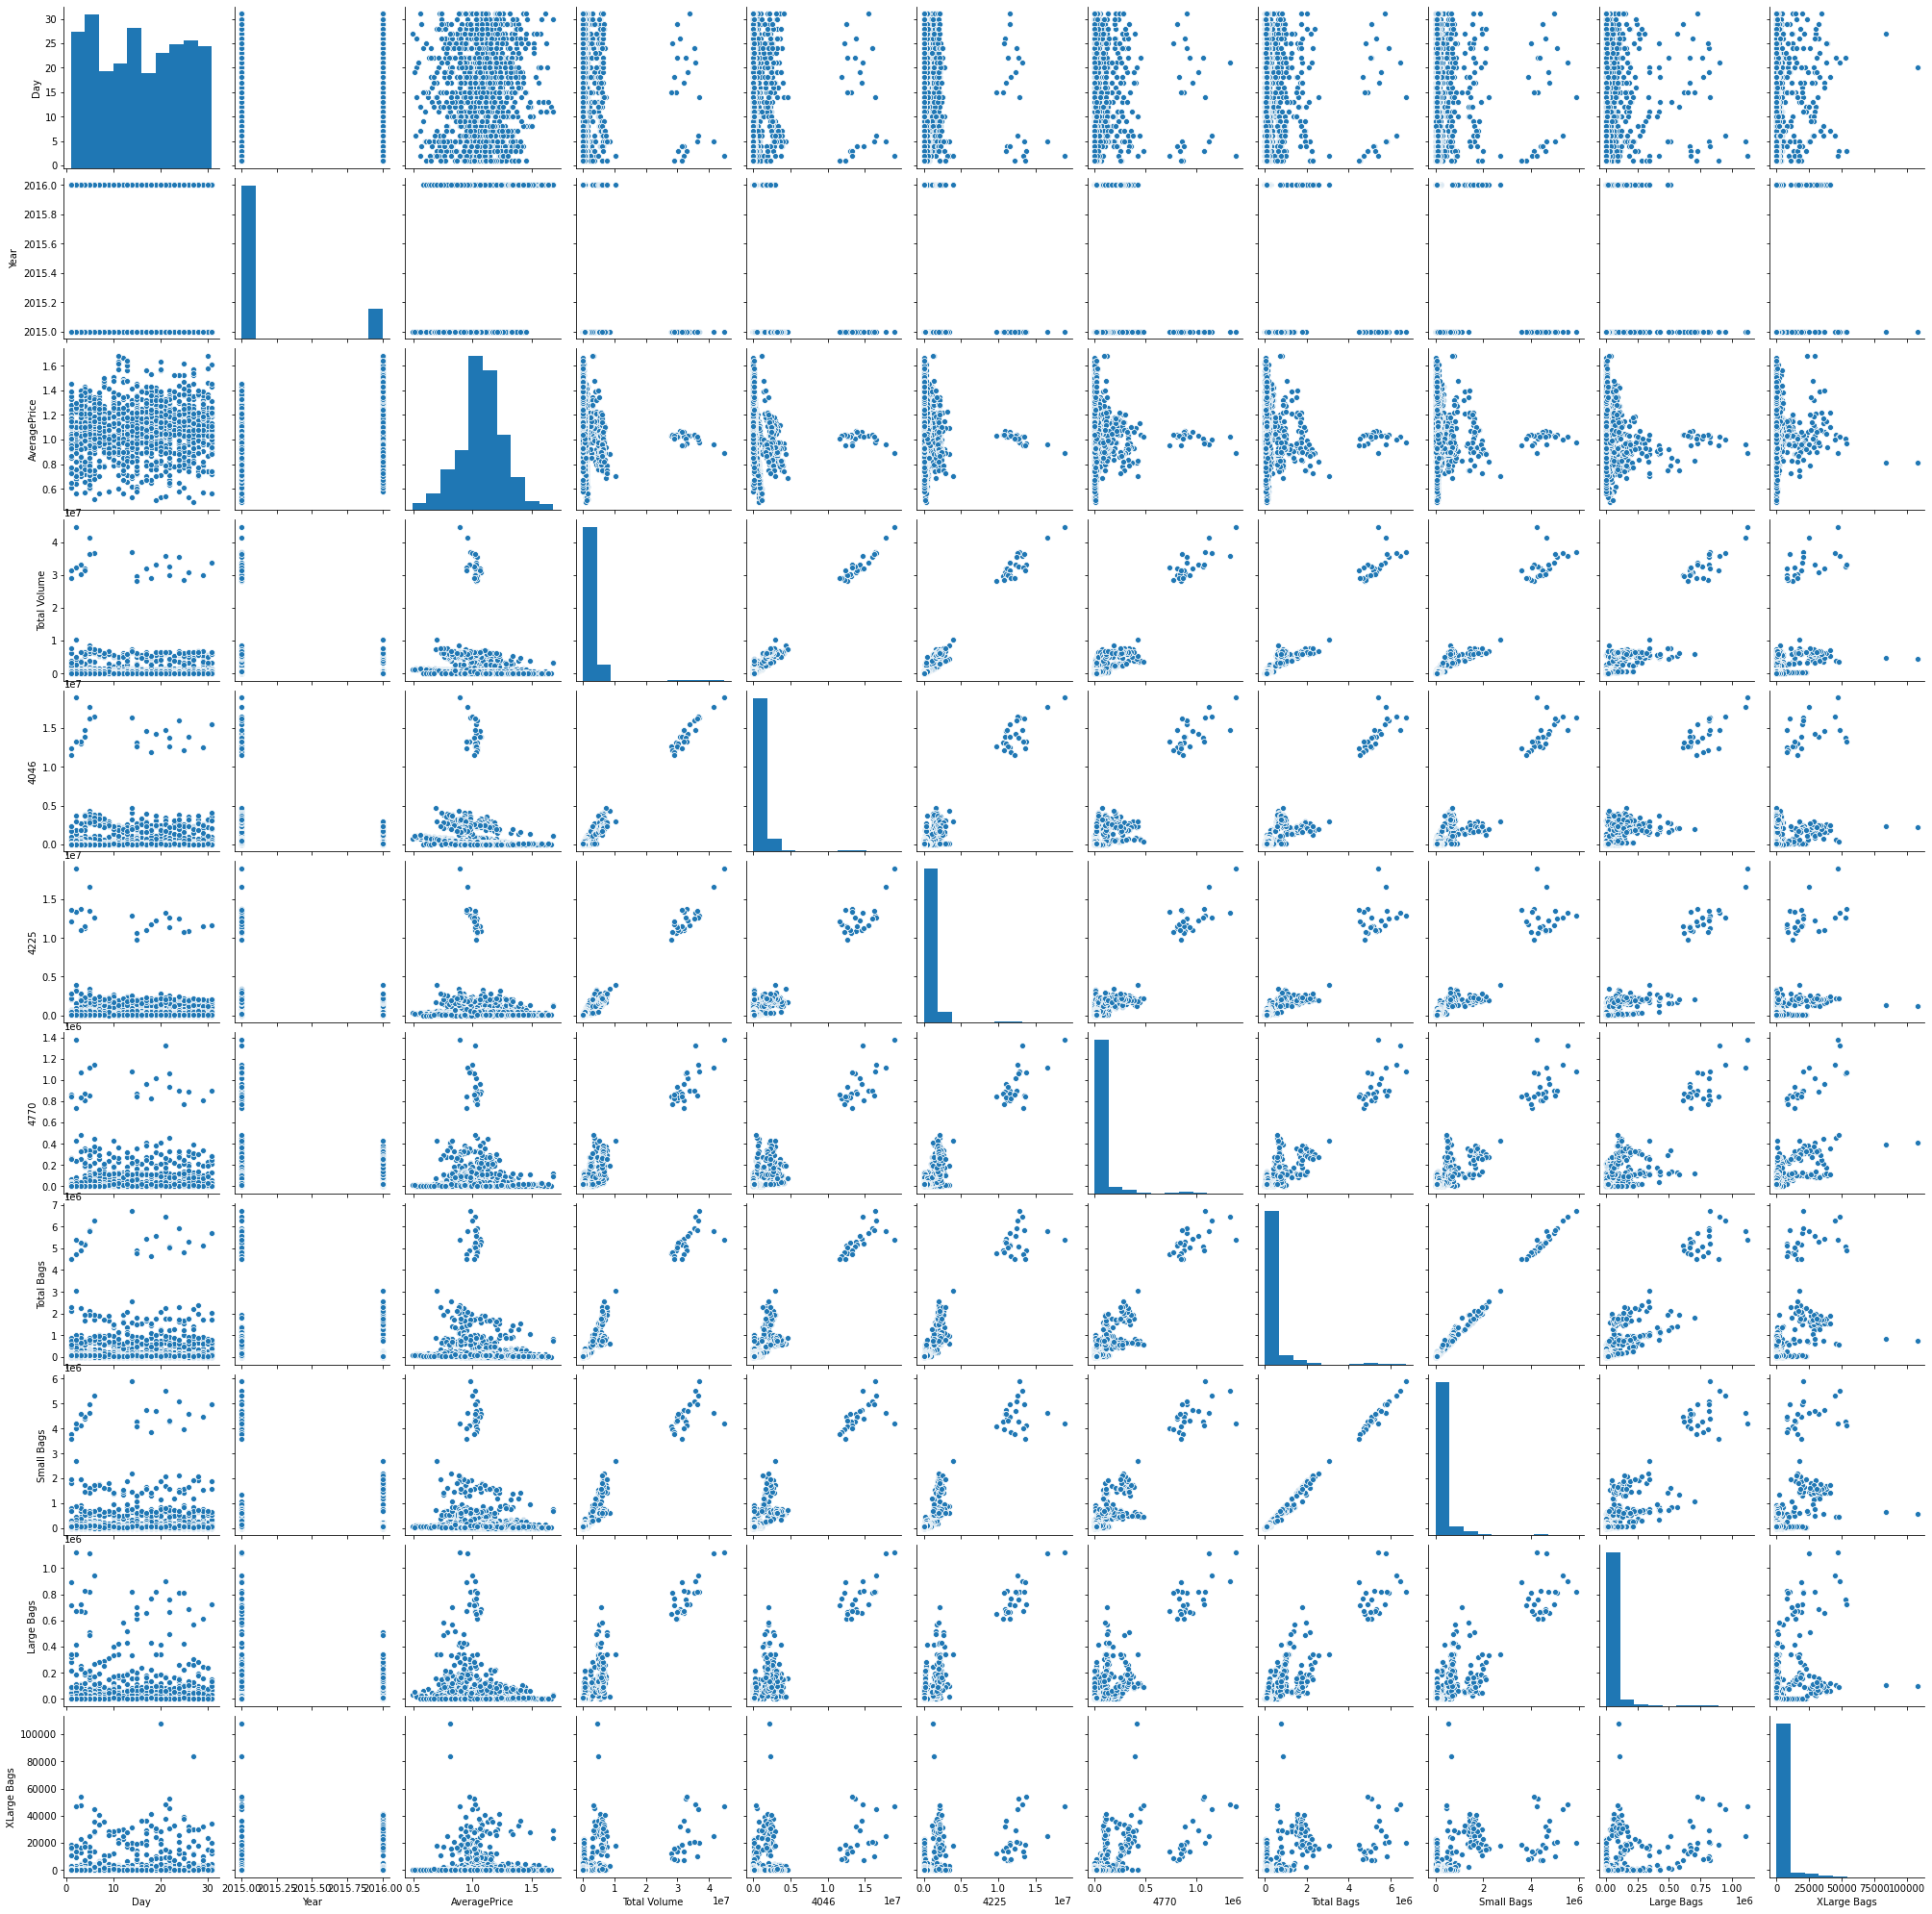

In [33]:
# Let's plot the pair plot
sns.pairplot(avacado)
plt.show()

### Plotting Outliers

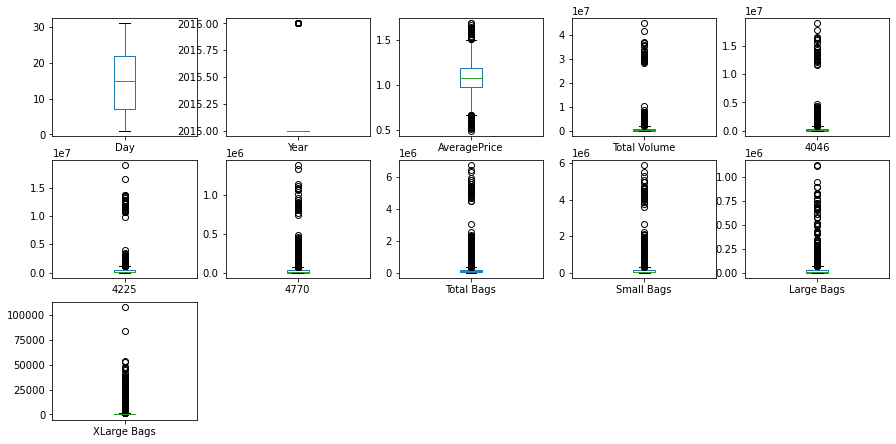

In [34]:
#Let's plot the boxplot of each column to check the outliers 
avacado.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10));

We can see that there are hardly any outliers

### Data Prepreation for Model

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(avacado.columns)):
    avacado[avacado.columns[column]]=le.fit_transform(avacado[avacado.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)


In [36]:
mappings

[{0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29,
  29: 30,
  30: 31},
 {0: 'APR',
  1: 'AUG',
  2: 'DEC',
  3: 'FEB',
  4: 'JAN',
  5: 'JUL',
  6: 'JUN',
  7: 'MAR',
  8: 'MAY',
  9: 'NOV',
  10: 'OCT',
  11: 'SEPT'},
 {0: 2015, 1: 2016},
 {0: 0.49,
  1: 0.51,
  2: 0.52,
  3: 0.53,
  4: 0.54,
  5: 0.56,
  6: 0.57,
  7: 0.58,
  8: 0.6,
  9: 0.61,
  10: 0.62,
  11: 0.63,
  12: 0.64,
  13: 0.65,
  14: 0.66,
  15: 0.67,
  16: 0.68,
  17: 0.69,
  18: 0.7,
  19: 0.71,
  20: 0.72,
  21: 0.73,
  22: 0.74,
  23: 0.75,
  24: 0.76,
  25: 0.77,
  26: 0.78,
  27: 0.79,
  28: 0.8,
  29: 0.81,
  30: 0.82,
  31: 0.83,
  32: 0.84,
  33: 0.85,
  34: 0.86,
  35: 0.87,
  36: 0.88,
  37: 0.89,
  38: 0.9,
  39: 0.91,
  40: 0.92,
  41: 0.93,
  42: 0.94,
  43: 0.95,
  44: 0.96,
  45: 0.97,
 

In [37]:
#Let's check for the outliers
from scipy.stats import zscore
z_score=abs(zscore(avacado))
print(avacado.shape)
avacado_final=avacado.loc[(z_score<3).all(axis=1)]
print(avacado_final.shape)

(1517, 13)
(1515, 13)


In [38]:
avacado=avacado_final
avacado.shape

(1515, 13)

In [39]:
avacado.skew()

Day             0.040842
Month          -0.016168
Year            1.839371
AveragePrice   -0.146794
Total Volume    0.002269
4046            0.002254
4225            0.002367
4770            0.002863
Total Bags      0.001805
Small Bags      0.001528
Large Bags      0.069310
XLarge Bags     1.028178
region          0.285834
dtype: float64

In [40]:
# Let's treat the skewness
for col in avacado.columns:
    if avacado[col].skew()>0.55:
        avacado[col]=np.log1p(avacado[col])

In [41]:
avacado.skew()

Day             0.040842
Month          -0.016168
Year            1.839371
AveragePrice   -0.146794
Total Volume    0.002269
4046            0.002254
4225            0.002367
4770            0.002863
Total Bags      0.001805
Small Bags      0.001528
Large Bags      0.069310
XLarge Bags     0.236765
region          0.285834
dtype: float64

# Modelling

### As per our problem statement we will analyse the data set for Classification and Regression

#### Regression Method for Continous values

In [42]:
#Let's assign the value of x and y for training and testing
x = avacado.drop(['AveragePrice'],axis=1)
y = avacado['AveragePrice']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [44]:
# Let's scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc=pd.DataFrame(x_sc,columns=x.columns)

#### Let's start with Regressor

In [45]:
#Lets import all the metrics and regressors
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [46]:
#Let's model using multiple Algorithms 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(120,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size = 0.20)
    for i in model:
        i.fit(x_train,y_train)
        pre = i.predict(x_test)
        r2_sc = r2_score(y_test,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  120 is 0.5885690563791506
R2 score correspond to random state  120 is 0.7683392055314997
R2 score correspond to random state  120 is 0.5584104494137754
R2 score correspond to random state  120 is 0.29985284362952247
R2 score correspond to random state  120 is 0.7235282990288505
R2 score correspond to random state  121 is 0.5682828822353421
R2 score correspond to random state  121 is 0.8334273628006653
R2 score correspond to random state  121 is 0.6293983285580428
R2 score correspond to random state  121 is 0.3742112897316676
R2 score correspond to random state  121 is 0.7389381156009766
R2 score correspond to random state  122 is 0.646191267829719
R2 score correspond to random state  122 is 0.7485842436145629
R2 score correspond to random state  122 is 0.609279502924484
R2 score correspond to random state  122 is 0.30416174298858745
R2 score correspond to random state  122 is 0.6979572235648476
R2 score correspond to random state  123 is 0.640944904

R2 score correspond to random state  146 is 0.615880030241905
R2 score correspond to random state  146 is 0.3422031218358126
R2 score correspond to random state  146 is 0.7519855750156956
R2 score correspond to random state  147 is 0.5803828387862653
R2 score correspond to random state  147 is 0.7775549276853292
R2 score correspond to random state  147 is 0.5867976042357576
R2 score correspond to random state  147 is 0.37163777034645695
R2 score correspond to random state  147 is 0.7307187000573908
R2 score correspond to random state  148 is 0.6446338801601106
R2 score correspond to random state  148 is 0.8323221470732625
R2 score correspond to random state  148 is 0.6163190616411304
R2 score correspond to random state  148 is 0.36725406827177287
R2 score correspond to random state  148 is 0.7334370946332334
R2 score correspond to random state  149 is 0.6429342993827256
R2 score correspond to random state  149 is 0.8322789341542969
R2 score correspond to random state  149 is 0.61936015

In [47]:
#Checking the best parameter for prediction of KNeighborsRegressor using GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 136,test_size=0.2)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_neighbors': 3}

In [48]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 85.27325255247804


In [49]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  5.353135313531353
Mean squared Error:  54.199486615328205
Root Mean Absolute Error:  2.3136843590972718


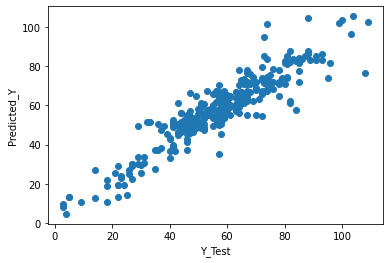

In [50]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y');

## KNeighbor Regressor has the highest R2 score ie 85% 

### For Regression problem we got the best result from KNeighbors with and accuracy of 85%

# Classification Model

#### Now we are taking region as indepependent variable and predicting using classificaton method

In [51]:
#assign the value of x and y for training and testing phase
x_c = avacado.drop(columns=['region','Day','Total Bags'])
y_c = avacado[["region"]]
print(x_c.shape)
print(y_c.shape)

(1515, 10)
(1515, 1)


In [52]:
# Let's scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [53]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,test_size=0.2,random_state=0)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(yc_test, yc_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(yc_test, yc_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(yc_test, yc_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(yc_test,yc_predict)*100:0.2f}%")

In [55]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {log.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 89.19%
Accuracy of Test Dataset: 87.13%


In [56]:
y_predict=log.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[49 10  0 31 31  9 22 26 19 19  7  6 48  0  9 29 17 19  0  1 39 16 41 17
 45  9  1 34 36 49  1 17  6 38 42  6 42 42 41 30 11 18 32 23 19 43 28 25
  4 19 27 22 44 12 14 50  3  3 26  9 44  2 41 45 41 39  0 17 44 47  4 19
 46 41 37  4 26 32  6  4 50 12 35  0 17  0 13 46 32 26 47  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 31 29  5 49 14  6 42 12 29  5  4 44
 43  3  3  0 47 42 38  3 19 11 28 44 38 17 28  9  2 38 48  0 31 36 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32 46  5 34 47 41 25  8
  5 19 37  5  0 31 16  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  4  0  6 20 49 44 24 28  3 19 27 25 17 18 16 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  4  0 32  2 45  5  2 39 42 41 29 38
  0 22  7 45  7 34 23  6  8  2  4 31 26 47 34 31 16  4  8 22  7 23 48 27
 20 38 15  8  5  7 47 44 43 17 25  3 32 26 39 23 41 22 13 38 31 31 28 42
 48 26 22  6  4  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  9  0 ..

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(xc_train, yc_train)
print(f"Accuracy of Train Dataset: {tree.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 22.85%
Accuracy of Test Dataset: 18.81%


In [58]:
y_predict=tree.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[49  2  0  2  2  2  0  2  2  2  2  6 48  0  2  2  2  2  0  2  2  0  2  2
  2  2  2  6  2  2  2  2  6  2 49  6  6 42  2  2  2  0  0  2  2  2  0  2
  0  3  2  0  2  2  2  2  3  3  2  2  2  2  2  2  2  2  0  2  2  2  0  2
  0  2  2  0  2  0  6  0  2  2  2  0  2  0  0  0  0  2  2  0  0  2 48  2
  2  2  2  2  3  0  2  0  2  0  2  2  2  2  0  6  2  6 42  2  2  0  0  2
  2  2  2  0  2 42  2  2  2  2  0  2  2  2  0  2  2  2 48  0  2  0  2  2
  2  6 42  0  2  2  2  2 49  0  0  6  2  0  0  2  0  0  0  2  2  2  3  2
  0  2  2  0  0  2  0  0  2  2  2  2  2  2  2  2  2  2  2  6  2  2  2  2
  0  0  6  2 49  2  2  0  2  2  2  2  2  0  0  2  2  0  2  2  2  2  2  2
  2  2  2  2  2  2  0  3  2  2  0  0  0  0  0  2  2  0  2  2  2  2  2  2
  0  0  2  2  2  2  2  6  2  2  0  2  2  2  2  2  0  0  2  0  2  2 49 49
  2  2  2  2  0  2  2  2  2  2  2  3  0  2  2  2  2  0  0  2  2  2  0 49
  6  2  0  6  0  0  2  2  2  0 49  2  2  2  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  0 11 ..

In [59]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 77.06%
Accuracy of Test Dataset: 76.90%


In [60]:
y_predict=svm_rbf.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[ 6 31  0 31 31  9 22 26 19 19  7  6  6  0  9  1 17 19  0  1 39 28 41 17
 37  9  1  6 36 11  1 17  6 38  6  6  6 42 41 30 11 18 22  1 19 42 28 25
 28 19 27 22  3 12  6 31  3  3 26  9  3  2 41 37 41 15  0 31 44  1  4 19
 46 41 37  4 26 22  6  4 50 12  7  0 31  0 13  0 22 26 47  0 46  9  6 12
  1  3 44 27  3 13  1  5 26  5  7  2 31 29  5  6  7  6 42 12 29  5  4 44
 42  3  3  0 47 42 38  3 19 11  5 44 38 31  0  9  2 38  6  0 31 44 44  1
  1  6 42 28  2 31 38 31  6 28 46  6 31  5  5 31 22  5  0 34 47 41  9  2
  5 19 37  5  0 31 28  0 50 44 38  6  2  6 39 37 24  1 31  6 12 11 26 34
  4  0  6 36  6 44  6  4  3 19 27 25 17 18 28 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 37  1 18  0  2  0 22  2 45  5  2 34 42 41 29 50
  0 22  7 37  3 34 47  6  8  2  4 31 26 47 34 31 28  4  2 22  7  1  6 27
 36 38 15  8  5  7 47 44 42 31 25  3 22 26 34  1 41 22 13 38 31 31 28  6
  6 26 22  6  4  4  2 12 12  4  6 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 11  0 ..

In [61]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {forest.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 96.70%


In [62]:
y_predict=forest.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  0  9  1 17 19  0  1 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42 42  6 42 41 30 11 18 22 47 19 43 28 25
 28 19 27 22 44 12 14 31  3  3 26  9  3  2 41 45 41 15  0 17 44 47  4 19
 46 41 37  4 26 32  6 28 50 12  7  0 17  0 13 46 22 26 47  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 10 29  5  6  7  6 42 12 29  5  4 44
 43  3  3  0 47 42 38  3 19 11  5 44 38 17  5  9  2 38 48  0 10 44 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32  5  5 34 47 41  3  8
  5 19 37  5  0 10 28  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  4  0  6 20 49 44 24  4  3 19 27 25 17 18 16 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  4  0 32  2 45  5  2 39 21 41 29 38
  0 22  7 45  3 34 23  6  8  2  4 31 26 47 34 31 16  4  8 22  7 29 49 27
 20 34 15  8  5  7 23 44 43 31 25  3 22 26 31 23 41 22 13 38 31 10 28 42
  6 26 22  6 28  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  9  0 .

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gbc.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 91.75%


In [64]:
y_predict=gbc.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  5  9  1 17 19  0  1 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42 42  6 42 41 30 11 18 22 29 19 24 47 25
 28 19 27 22 44 12 14 31  3  3 26  9  3  2 41 45 41 36  0 17 44 47  4 19
 46 41 37  4 17 32  6 28 50 12  7  0 17  0 13 46 22 26 23  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 10 19  5  6  7  6 42 12 29  5  4 44
 42  3  3  0 47 42 38  3 19 38  5 44 38 17  5  9  2 38 48  0 10 44 44 23
  1  6 42  1  2 31 38 31 49 47 46  6 31  5  5 10 32  5  5 34 47 38 25  8
  5 19 37  5  0 10 16  0 50 44 38  6  2 24 39 45 24  1 31  6 35 11 26 34
  4  0  6 20 49 44 24  4  3 19 27 41 17 18 16 19  7  0 47  1 47  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  4  0 32  2 47  5  2 39 21 41 47 38
  0 22  7 45  3 34 23  6  8  2  4 31 26 47 34 31 16  4  8 22  7  1 49 27
 36 34 15  8  5  7 23 44 42 17 25  3 18 26 31 23 41 22 13 38 31 10 28 42
  6 26 22  6 28 28  7 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 10  0 .

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
tree_ex=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
tree_ex.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {tree_ex.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree_ex.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 54.13%
Accuracy of Test Dataset: 52.81%


In [66]:
y_predict=tree_ex.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[ 6 31  0 31 31  9 22 26 19 19  3  6  6  0  9  1 31 19  0  1  2  0 38 31
  0  9  1  6  3 11  1 31  6 31  6  6  6  6  1 26 26  9 22  1 19  6 28  9
 28  3 26 22 44 12  6 31  3  3 26  9  3  2  1  3  1  0  0 31 44  1  4 19
  0 38 44  4 26  0  6  4 31 12  7  0 31  0 22  0 22 26  1  0  0  9  6 12
  1  3 44 26  3 22  1  0 26  5  7  2 31 19  5  6  3  6  6 12  1  5  4 44
 31  3  3  0  1  6 38  3 19 38  5 44 38 31  5  9  2 38  6  0  6  0 44  1
  1  6  6  0  2 31  1 31  6  0  0  6 31  5  0 31  0  5  0  4  1 38  9  2
  5 19  0  5  0 31  4  0 31 44 38  6  2  6  2  3  6  1 31  6  2 31 26 34
  4  0  6  0  6  0  6  4 44 19 26  9 31 22 28 19  3  0  3  1  1  2 31  3
  1  2  0  7 44  0  4  3  3  1  9  0  4  0  0  2  1  0  2  2  6 12  1  1
  0 22  3  3  3 34  1  6  2  2  4 31 26  1 34 31  0  4  2 22  7  1  6 26
  0 38  0  2  5  7  1 44 42 31  9  3 22 26 31  1  1 22 12  1 31 31  4  6
  6 26 22  6  4  4  4 12 12  4  6 31 38 12  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 11  0 .

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {knn.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 96.70%
Accuracy of Test Dataset: 94.39%


In [68]:
y_predict=knn.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  0  9 29 17 19  0  1 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42  6  6 42 41 30 11 18 32 47 19 43 28 25
 28 19 27 22 44 12 14 31  3  3 26  9  3  2 41 45 41 15  0 17 44 47  4 19
 46 41 37  4 26 32  6 28 50 12  7  0 17  0 13 46 22 26 23  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 10 29  5 49  7  6 42 12 29  5  4 44
 43  3  3  0 47 42 38  3 19 11  5 44 38 17  5  9  2 38 48  0 10 44 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32  5  5 34 47 41 25  8
  5 19 37  5  0 10 16  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  2  0  6 20 49 44 24  4  3 19 27 25 17 18 16 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  8  0 32  2 45  5  2 39 24 41 29 38
  0 22  7 45  7 34 23  6  8  2  4 31 26 47 34 10 16  4  8 22  7  1 49 27
 20 38 15  8  5  7 23 44 43 31 25  3 32 26 34 23 41 22 13 38 31 10 28 42
  6 26 22  6  4  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 10  0 .

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gnb.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 94.72%
Accuracy of Test Dataset: 88.78%


In [70]:
y_predict=gnb.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  5  9 47 17 19  0 29 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42 42  6 42 41 30 11 18 22 29 19 43 16 25
 28 19 27 22 44 12 14 50  3  3 26  9  3  2 41 47 41 15  0  1 44 47  4 19
 46 41 37  4 26 32  6 28 50 12 35  0 17  0 13 46 22 26 47  0 46  9 48 12
 29  3 44 27  3 13  1  5 26  5 35  2 10 29  5  6  7  6 42 12 29  5 28 44
 43  3  3  0 47 42 38  3 19 11  5 44 38 17  5  9  2 38 48  0 10 44 44 23
 29  6 42 16  2 31 38 31 49 16 46  6 17  5  5 10 32  5  5 40 47 41  9  8
  5 19 37  5  0 10 28  0 50 44 38  6  2 14 39 45 24  1 50  6 35 11 26 34
  4  0  6 20 49 44 24  4 44 19 27 25 17 18 16 19  7  0 47  1  1  2 11  3
 29  2 37 35 44 15 28  3 45  1 18  0  4  0 32  2 45  5  2 39 42 41 29 34
  0 22  7 45  3 34 23  6  8  2  4 10 26 47 34 17 16  4  8 22 35 29 49 27
 20 34 15  8  5 35 23 44 31 17 25  3 32 26 50 23 41 22 13 38 38 10 28 42
  6 26 22  6 28  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  6  0 .

In [71]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {adb.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 14.36%
Accuracy of Test Dataset: 12.87%


In [72]:
y_predict=adb.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49  2  4  2  2  2  4  2  2  2  2 49  6  4  2  2  2  2  4  2  2  4  2  2
  2  2  2 49  2  2  2  2  6  2 49 49 49 49  2  2  2  4  4  2  2 43  4  2
  4  2  2  4  2  2  2  2  2  2  2  2  2  2  2  2  2  2  4  2  2  2  4  2
  4  2  2  4  2  4 49  4  2  2  2  4  2  4  4  4  4  2  2  4  4  2  6  2
  2  2  2  2  2  4  2  4  2  4  2  2  2  2  4  6  2  6 49  2  2  4  4  2
 43  2  2  4  2 49  2  2  2  2  4  2  2  2  4  2  2  2  6  4  2  4  2  2
  2 49 49  4  2  2  2  2 49  4  4  6  2  4  4  2  4  4  4  2  2  2  2  2
  4  2  2  4  4  2  4  4  2  2  2  2  2  2  2  2  2  2  2  6  2  2  2  2
  4  4  6  2 49  2  2  4  2  2  2  2  2  4  4  2  2  4  2  2  2  2  2  2
  2  2  2  2  2  2  4  2  2  2  4  4  4  4  4  2  2  4  2  2 43  2  2  2
  4  4  2  2  2  2  2  6  2  2  4  2  2  2  2  2  4  4  2  4  2  2 49 27
  2  2  2  2  4  2  2  2 43  2  2  2  4  2  2  2  2  4  4  2  2  2  4 49
  6  2  4 49  4  4  2  2  2  4 49  2  2  2  2]

Confusion Matrix: 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0 11 .

In [73]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM_rbf','Decision Tree','Random Forest','Gradient Boosting','Extra Trees','KNeighbors','GaussianNB','AdaBoost'],
                     'Training Accuracy':[(log.score(xc_train,yc_train)),svm_rbf.score(xc_train,yc_train),tree.score(xc_train,yc_train),forest.score(xc_train,yc_train),gbc.score(xc_train,yc_train),tree_ex.score(xc_train,yc_train),knn.score(xc_train,yc_train),gnb.score(xc_train,yc_train),adb.score(xc_train,yc_train)],
                     'Test Accuracy':[(log.score(xc_test,yc_test)),svm_rbf.score(xc_test,yc_test),tree.score(xc_test,yc_test),forest.score(xc_test,yc_test),gbc.score(xc_test,yc_test),tree_ex.score(xc_test,yc_test),knn.score(xc_test,yc_test),gnb.score(xc_test,yc_test),adb.score(xc_test,yc_test)]})

models.sort_values(by='Training Accuracy', ascending=True)

,Model,Training Accuracy,Test Accuracy
8,AdaBoost,0.143564,0.128713
2,Decision Tree,0.228548,0.188119
5,Extra Trees,0.541254,0.528053
1,SVM_rbf,0.770627,0.768977
0,Logistics Regression,0.891914,0.871287
7,GaussianNB,0.947195,0.887789
6,KNeighbors,0.966997,0.943894
3,Random Forest,1.000000,0.966997
4,Gradient Boosting,1.000000,0.917492


In [74]:
#Let's check the cross validate for our models
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', log), ('Support Vector Machine (rbf)', svm_rbf),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('ExtraTreesClassifier', tree_ex),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results=model_selection.cross_val_score(model[1],xc_train,yc_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 84.90%
Cross validated Accuracy of Support Vector Machine (rbf): 72.28%
Cross validated Accuracy of Decision Tree: 20.80%
Cross validated Accuracy of Random Forest: 95.87%
Cross validated Accuracy of GradientBoostingClassifier: 87.54%
Cross validated Accuracy of ExtraTreesClassifier: 51.98%
Cross validated Accuracy of KNeighborsClassifier: 92.99%
Cross validated Accuracy of GaussianNB: 91.50%
Cross validated Accuracy of AdaBoostClassifier: 14.94%


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree,
    'Support Vector Machine (rbf)': svm_rbf,
    'Random Forest':forest,
    'GradientBoostingClassifier':gbc,
    'ExtraTreesClassifier':tree_ex,
    'GaussianNB':gnb,
    'AdaBoostClassifier':adb    
    
}

regression_models = {
    'LogisticRegression': log
}

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}: {}'.format(name, accuracy_score(yc_test, y_pred)*100))

KNeighboursClassfier: 87.12871287128714
DecisionTreeClassifier: 18.81188118811881
Support Vector Machine (rbf): 87.45874587458746
Random Forest: 96.03960396039604
GradientBoostingClassifier: 91.74917491749174
ExtraTreesClassifier: 52.8052805280528
GaussianNB: 85.8085808580858
AdaBoostClassifier: 12.871287128712872


In [77]:
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}\t{}'.format(name, accuracy_score(yc_test, y_pred)))

LogisticRegression	0.8976897689768977


## We can say that Random Forest is the best model with 97% Accuracy

In [78]:
#Let's save the best model
import joblib

#save the model as a pickle in a file
joblib.dump(model,'avacado.pkl')

['avacado.pkl']